<p align="center">
  <img src="https://img.freepik.com/vetores-premium/empresario-apertando-as-maos-contrato-de-credito-de-emprestimo-bancario-promocao-de-programa-de-fidelidade-com-desconto-boa-taxa-de-juros-emprestimo-de-organizacao-ou-entidade-emprestimos-pessoais-com-periodos-sem-juros_458444-1327.jpg" alt="">
</p>


#<center>**Machine Learning I - Trabalho Final**<center>
###**Componentes**: Cláudia, Daniel, Iago, Italo e Lorena  

&nbsp;
&nbsp;

##<center>**Credit Risk Dataset**<center>
Link: https://www.kaggle.com/datasets/laotse/credit-risk-dataset?resource=download

Este banco de dados foi obtido no Kaggle e contém informações fictícias detalhadas sobre mais de 30.000 empréstimos concedidos. Ao final desta apresentação, nosso objetivo é desenvolver modelos preditivos que possam auxiliar na tomada de decisões quanto à concessão de empréstimos. Utilizaremos a coluna 'loan_status' como target (y), pois ela nos indica o resultado do crédito concedido.

Ao explorar os dados, nosso foco principal será identificar padrões e tendências que estejam relacionados ao risco de crédito. Analisaremos fatores como histórico de pagamentos, informações pessoais dos mutuários, características dos empréstimos e outros atributos relevantes. Com base nesses insights, poderemos construir modelos preditivos capazes de avaliar a probabilidade de inadimplência futura.

Com a aplicação desses modelos, esperamos aprimorar o processo de análise de crédito, fornecendo informações valiosas para auxiliar na tomada de decisões. Dessa forma, poderemos identificar oportunidades de concessão de empréstimos de forma mais precisa e eficiente, mitigando o risco e promovendo uma gestão mais efetiva das operações de crédito.


### importação bibliotecas utilizadas e banco de dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Metadados
* **person_age** = idade
* **person_income** = salário anual
* **person_home_ownership** = hipoteca, aluguel ou casa própria
* **person_emp_length** = duração do emprego atual
* **loan_intent** = intenção do empréstimo (Pessoal, despesa médica, etc.)
* **loan_grade** = classificação de risco de crédito (A, B, C, D, E, F, G)
* **loan_amnt** = valor do empréstimo
* **loan_int_rate**	= taxa do empréstimo (Juros)
* **loan_status** = status do empréstimo (0 = Pago, 1 = Inadimplente)
* **loan_percent_income** = renda percentual do empréstimo (loan_amnt / person_income)
* **cb_person_default_on_file** = indica se o cliente já esteve indimplente (Y/N)
* **cb_person_cred_hist_length** = Comprimento histórico do crédito em anos

## Análise exploratória dos dados

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


###Verificar dados nulos

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

encontramos dados nulos na taxa de emprestimo (loan_int_rate) e na duração do atual emprego (person_emp_length)

In [ ]:
df.groupby("loan_grade")['loan_int_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_grade,,,,,,,,
A,9774.0,7.327651,1.043984,5.42,6.62,7.490,7.90,9.63
B,9395.0,10.995555,0.909457,6.00,10.36,10.990,11.71,12.69
C,5828.0,13.463542,0.961883,6.00,12.98,13.480,13.99,16.11
D,3314.0,15.361448,1.111152,6.00,14.74,15.310,16.00,18.49
E,881.0,17.009455,1.323164,6.00,16.32,16.820,17.93,20.69
F,214.0,18.609159,1.375524,15.01,18.09,18.535,19.38,22.06
G,59.0,20.251525,1.066830,17.34,19.82,20.160,20.88,23.22


Optamos por trocar os 'loan_int_rate' nulos pelo valor da média, discriminando ´pr 'loan_grade' pelo fato do desvio padrão apresentar baixo valor. Essa ideia surgiu pelo fato da média e mediana serem valores próximos.

In [ ]:
means = df.groupby("loan_grade")["loan_int_rate"].mean()

# Preencher os valores nulos com a média da respectiva loan_grade
df["loan_int_rate"].fillna(df.groupby("loan_grade")["loan_int_rate"].transform("mean"), inplace=True)


após

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.009816,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.219338,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.995555,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.463542,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Optamos por não realizar a mesma ação nos dados 'person_emp_length' por entedermos que eles não possuem a mesma relação e, apesar de terem forte interferência na análise do risco de crédito, o número de linhas com valores nulos na coluna é pequeno em relação ao tamanho total do dataset e não afeta significativamente a análise.


In [ ]:
df.loc[df['person_emp_length'].isnull()].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,895.000000,895.000000,0.0,895.000000,895.000000,895.000000,895.00000,895.000000
mean,27.284916,44229.924022,NaN,7041.508380,10.017989,0.315084,0.19114,5.623464
std,5.885403,37369.685990,NaN,5194.945349,3.419411,0.464809,0.12094,3.839350
min,21.000000,4200.000000,NaN,1000.000000,5.420000,0.000000,0.01000,2.000000
25%,23.000000,24000.000000,NaN,3200.000000,7.140000,0.000000,0.09000,3.000000
50%,25.000000,36000.000000,NaN,6000.000000,9.910000,0.000000,0.17000,4.000000
75%,30.000000,55000.000000,NaN,9675.000000,12.690000,1.000000,0.27000,8.000000
max,70.000000,648000.000000,NaN,35000.000000,21.360000,1.000000,0.65000,27.000000


In [ ]:
df = df.dropna(subset=['person_emp_length'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 31686 non-null  object 
 5   loan_grade                  31686 non-null  object 
 6   loan_amnt                   31686 non-null  int64  
 7   loan_int_rate               31686 non-null  float64
 8   loan_status                 31686 non-null  int64  
 9   loan_percent_income         31686 non-null  float64
 10  cb_person_default_on_file   31686 non-null  object 
 11  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [ ]:
# verificando dados duplicados
df.duplicated().sum()

157

In [ ]:
# dropando dados duplicados
df = df.drop_duplicates()

In [ ]:
# verificando dados duplicados após
df.duplicated().sum()

0

In [ ]:
#dimensões de um DataFrame ou matriz bidimensional.

df.shape

(31529, 12)

## Análise do target (y)

In [ ]:
df['loan_status'].value_counts(normalize=True)

0    0.784072
1    0.215928
Name: loan_status, dtype: float64

In [ ]:
fig = px.pie(df, names='loan_status', title='Proporção de inadimplência')
fig.update_layout(
    title={
        'text': "Proporção de inadimplência",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font=dict(size=25, family='Arial', color='black')
)
fig.show()



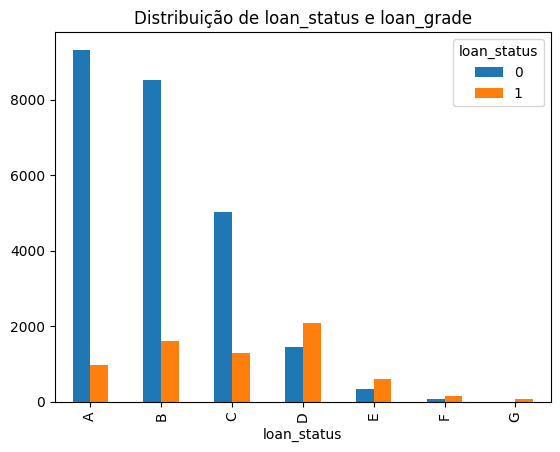

In [ ]:
df_counts = df.groupby(['loan_grade', 'loan_status']).size().unstack()

df_counts.plot(kind='bar')
plt.title('Distribuição de loan_status e loan_grade')
plt.xlabel('loan_status')
plt.show()

## Analisando as features (X)

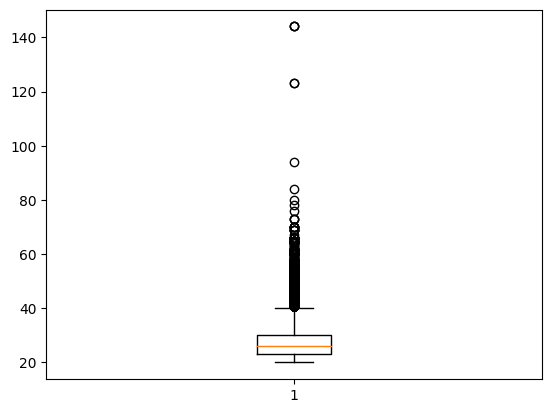

In [ ]:
plt.boxplot(x=df['person_age'])
plt.show()

In [ ]:
df.loc[df['person_age'] > 80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.995555,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,13.463542,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.510000,0,0.11,N,24


* por opção, não trabalharemos com pessoas com idade acima de 80 anos por apresentarem alguns dados não confiáveis.

  Ex: cliente com 123 anos
* optamos também por ordenar os dados da base de acordo com a classificação do risco, para uma melhor visualização nos gráficos

In [ ]:
df.drop(df[df['person_age'] > 80].index, inplace=True)

# Ordenando os dados
df = df.sort_values(by='loan_grade')

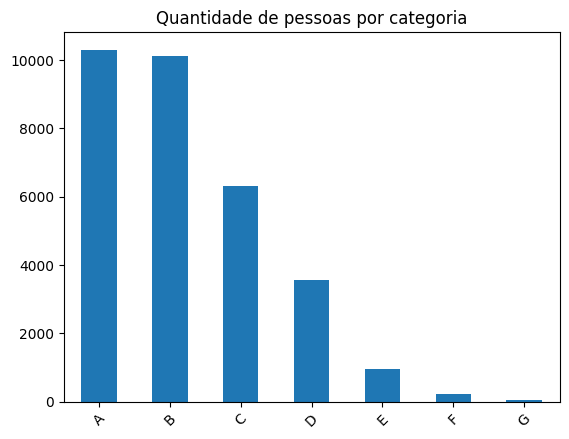

In [ ]:
counts = df['loan_grade'].value_counts()

ax = counts.plot(kind='bar')
plt.title('Quantidade de pessoas por categoria')

# acessa os rótulos do eixo x
labels = ax.get_xticklabels()

# rotaciona os rótulos do eixo x em 45 graus
ax.set_xticklabels(labels, rotation=45)
plt.show()


Confirmamos nesse segundo gráfico que a maior concentração de inadimplentes está na faixa de pessoas que ganham menos, onde o percentual do empréstimo em relação a renda é maior


### Correlação dos dados


In [ ]:
credit_risk_corr = df.corr()
credit_risk_corr

<ipython-input-23-c3e04f0fd843>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.142070,0.167176,0.052305,0.009466,-0.022943,-0.040557,0.878747
person_income,0.142070,1.000000,0.152378,0.313893,-0.008569,-0.164894,-0.293615,0.124001
person_emp_length,0.167176,0.152378,1.000000,0.113233,-0.053982,-0.082832,-0.053922,0.145034
loan_amnt,0.052305,0.313893,0.113233,1.000000,0.141235,0.112766,0.577362,0.042620
loan_int_rate,0.009466,-0.008569,-0.053982,0.141235,1.000000,0.338409,0.123661,0.013844
loan_status,-0.022943,-0.164894,-0.082832,0.112766,0.338409,1.000000,0.380215,-0.017666
loan_percent_income,-0.040557,-0.293615,-0.053922,0.577362,0.123661,0.380215,1.000000,-0.030575
cb_person_cred_hist_length,0.878747,0.124001,0.145034,0.042620,0.013844,-0.017666,-0.030575,1.000000


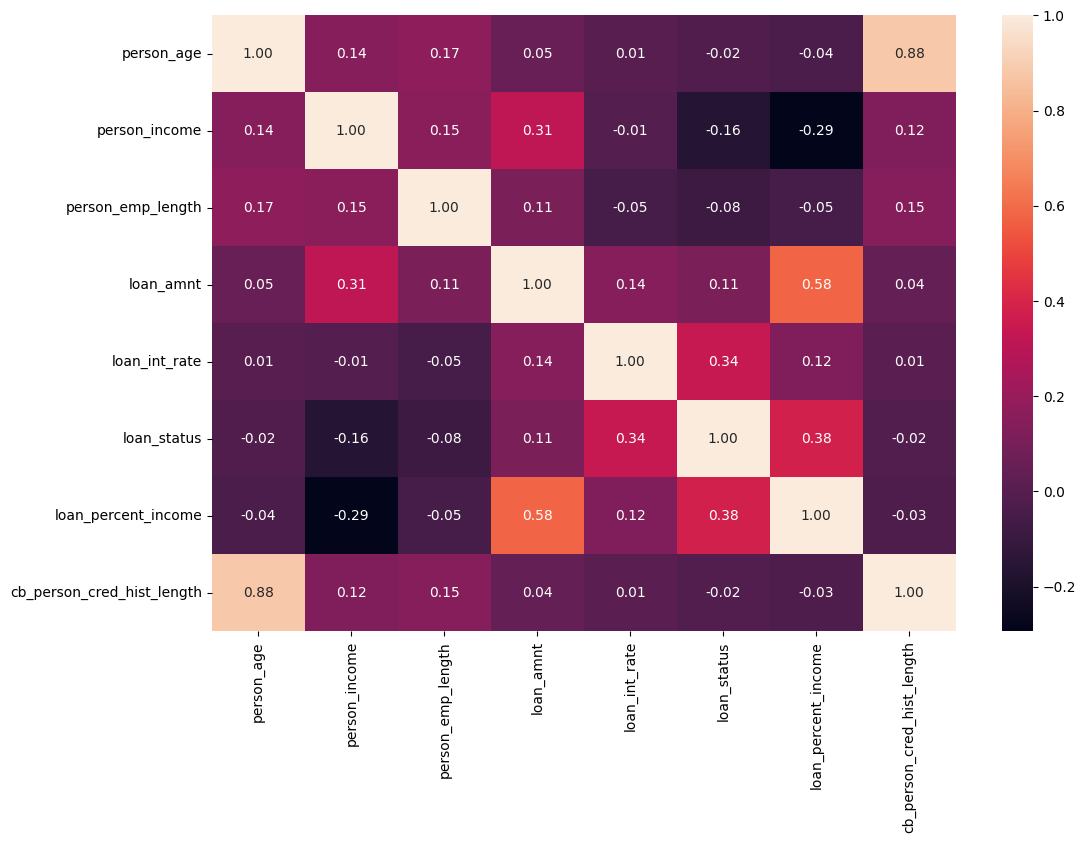

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(credit_risk_corr,  annot=True, fmt='.2f')
plt.show()

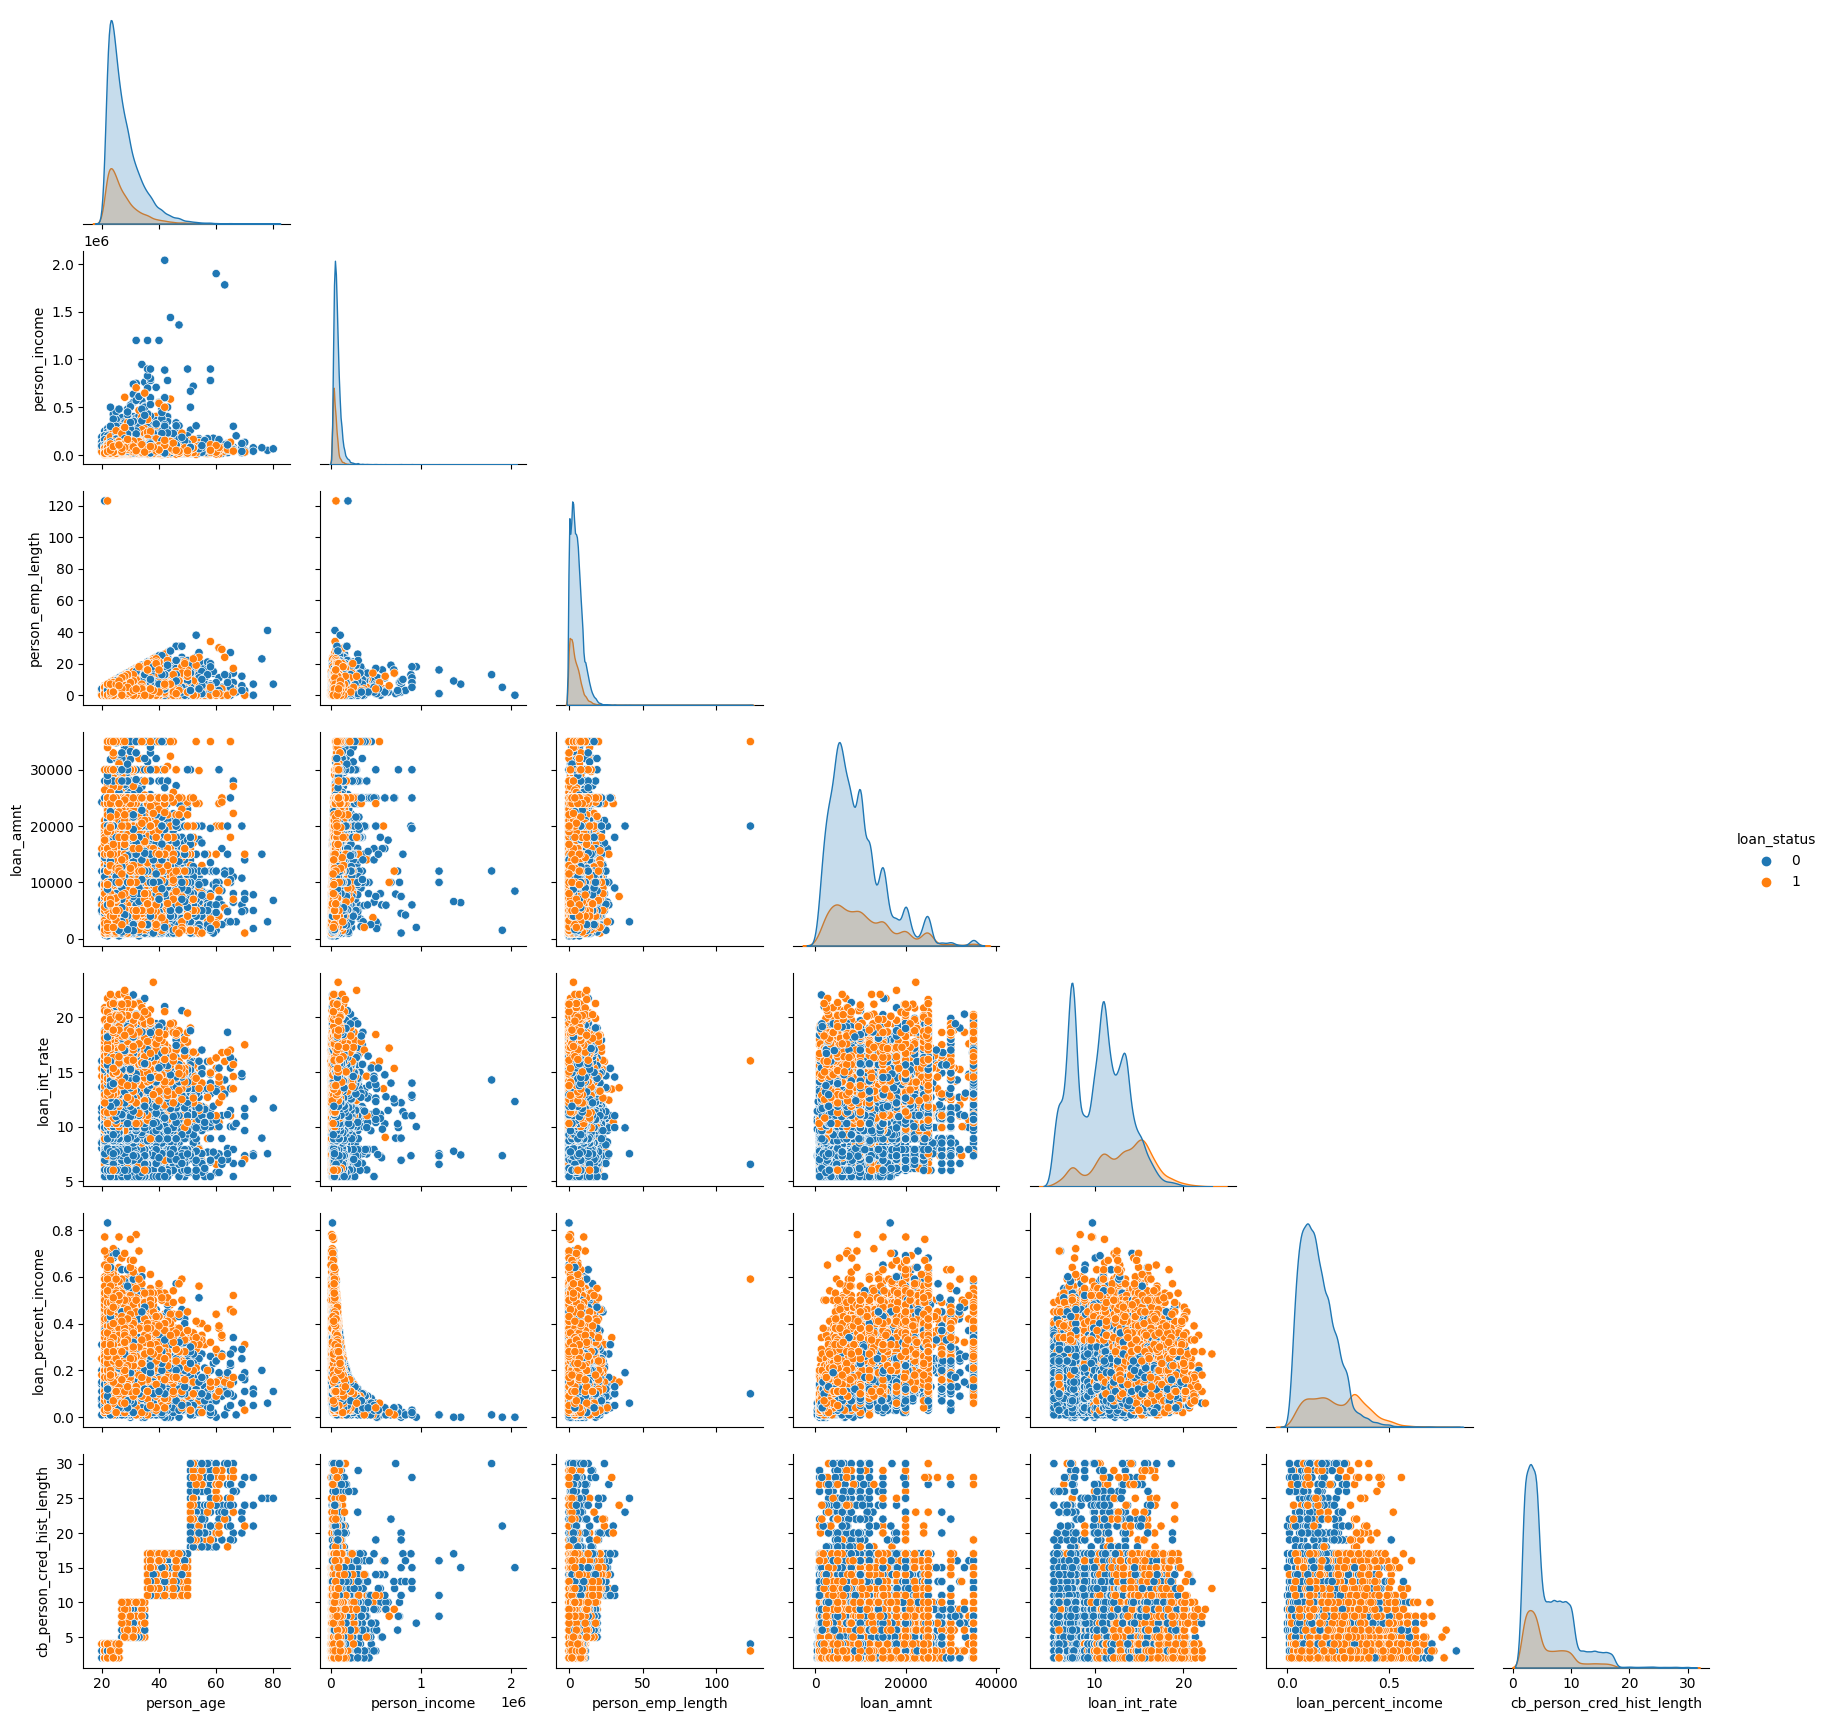

In [ ]:
sns.pairplot(data=df, hue='loan_status',corner=True)

###Será que pessoas mais jovens tendem a ser mais inadimplentes?

<Axes: xlabel='person_age', ylabel='count'>

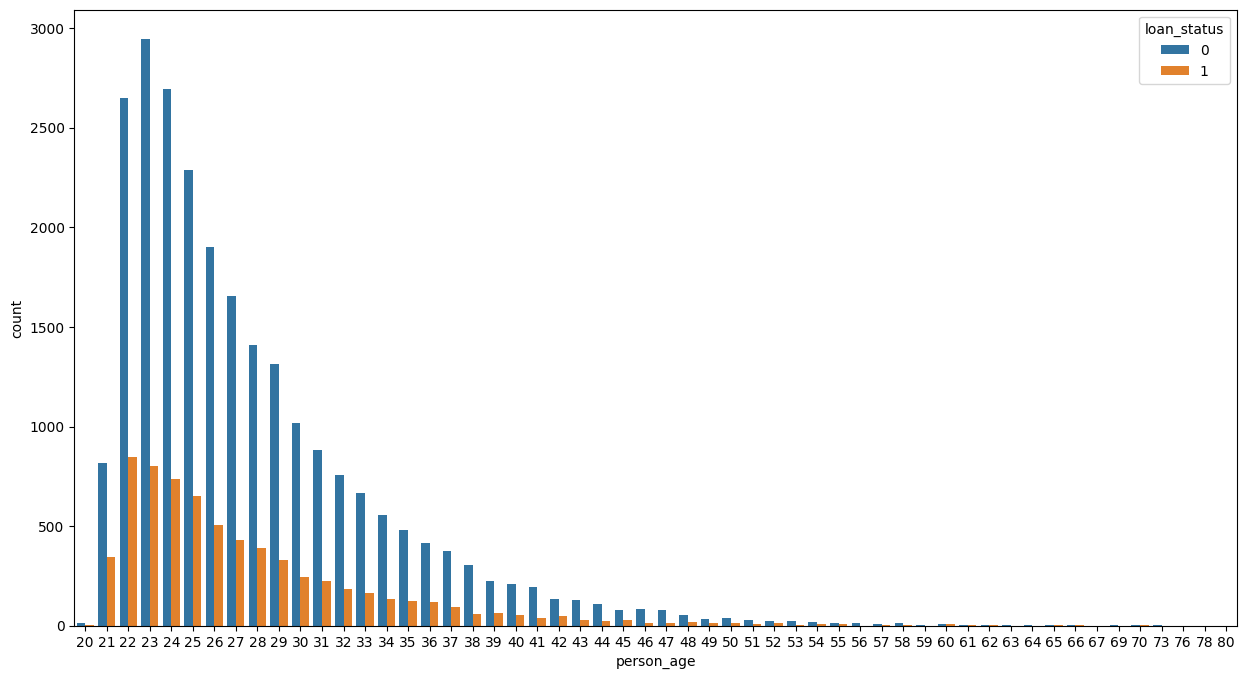

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(df, x="person_age", hue="loan_status")

In [ ]:
df['loan_status'] = df['loan_status'].replace({'Pago': 0, 'Inadimplente': 1})

# Calcula a porcentagem de inadimplentes por idade
default_by_age = df.groupby("person_age")["loan_status"].mean() * 100

# Cria o gráfico de barras
fig = px.bar(default_by_age, x=default_by_age.index, y=default_by_age.values,
             labels={"x": "Idade", "y": "% de inadimplentes"},
             title="Percentual de inadimplentes por idade")
fig.show()

Observamos que em pessoas acima de 60 anos a taxa de inadimplência é maior.

###O histórico de inadimplência reflete no atual status do empréstimo?

<ipython-input-28-674d89b7eb8d>:7: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



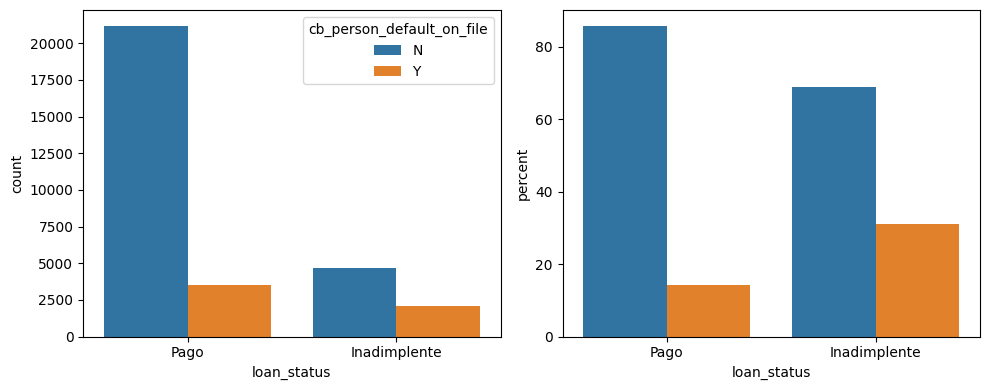

In [ ]:
df['loan_status'] = df['loan_status'].replace({0: 'Pago', 1:'Inadimplente'})
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.countplot(data = df, x="loan_status", hue="cb_person_default_on_file", ax=axs[0])

# Calcular as contagens por grupo
counts = df.groupby(["loan_status", "cb_person_default_on_file"]).size().reset_index(name="count")
counts["percent"] = counts.groupby("loan_status")["count"].apply(lambda x: 100 * x / float(x.sum()))

# Criar o gráfico de barras em percentual
sns.barplot(x="loan_status", y="percent", hue="cb_person_default_on_file", order=['Pago', 'Inadimplente'], data=counts, ax=axs[1]);
axs[1].legend_.remove()
plt.tight_layout()
plt.show()


Observamos que a pessoa que tem histórico de inadimplência é mais propicia a voltar a ser inadimplente do que algém que não tenha histórico

###A inadimplência tem relação com a categoria do cliente?

In [ ]:
df['loan_status'] = df['loan_status'].replace({'Pago':0, 'Inadimplente':1})

# Calcula a porcentagem de inadimplentes por idade
default_by_grade = df.groupby("loan_grade")["loan_status"].mean() * 100

# Cria o gráfico de barras
fig = px.bar(default_by_grade, x=default_by_grade.index, y=default_by_grade.values,
             labels={"x": "loan_grade", "y": "% de inadimplentes"},
             title="Percentual de inadimplentes por classificação")
fig.show()

Concluimos que a categoria do cliente está totalmente relacionada com o % de inadimplência

###A taxa de juros tem relação com a categoria do cliente?

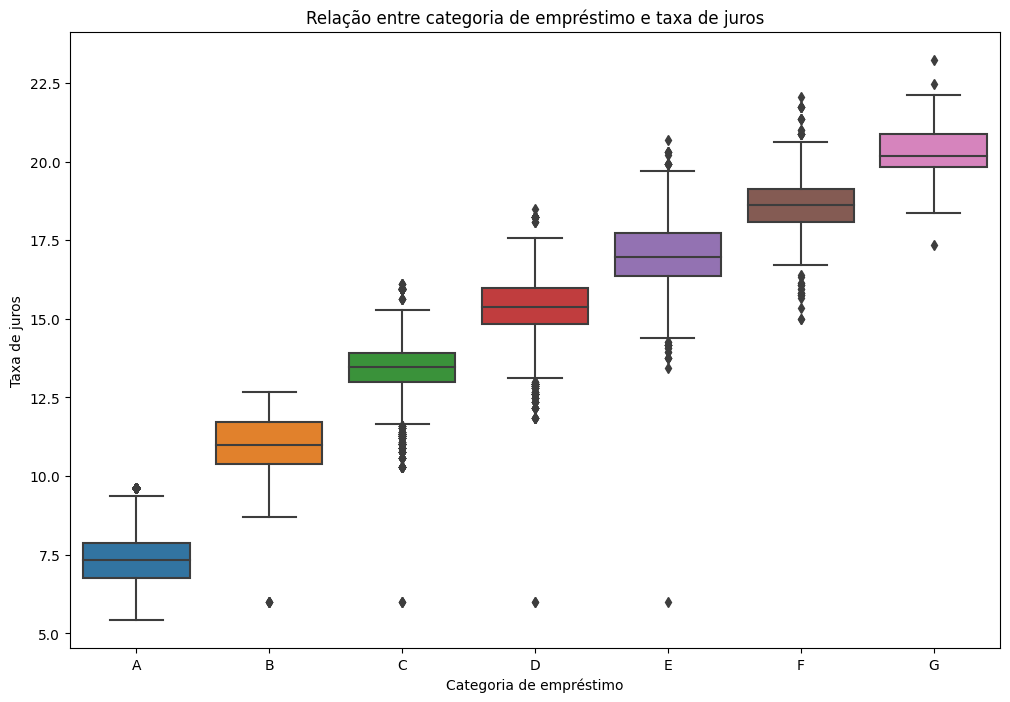

In [ ]:
# Filtra apenas as colunas relevantes
data = df[['loan_grade', 'loan_int_rate']]

# Cria o boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=data)
sns.set(style="ticks")

# Define o título e os rótulos dos eixos
plt.title("Relação entre categoria de empréstimo e taxa de juros")
plt.xlabel("Categoria de empréstimo")
plt.ylabel("Taxa de juros")

plt.show(fig)


Observamos que quanto maior a categoria do cliente, menor é a taxa de juros
&nbsp;
&nbsp;
&nbsp;
  

### O motivo do empréstimo tem relação com a inadimplência?

<Axes: xlabel='loan_status', ylabel='count'>

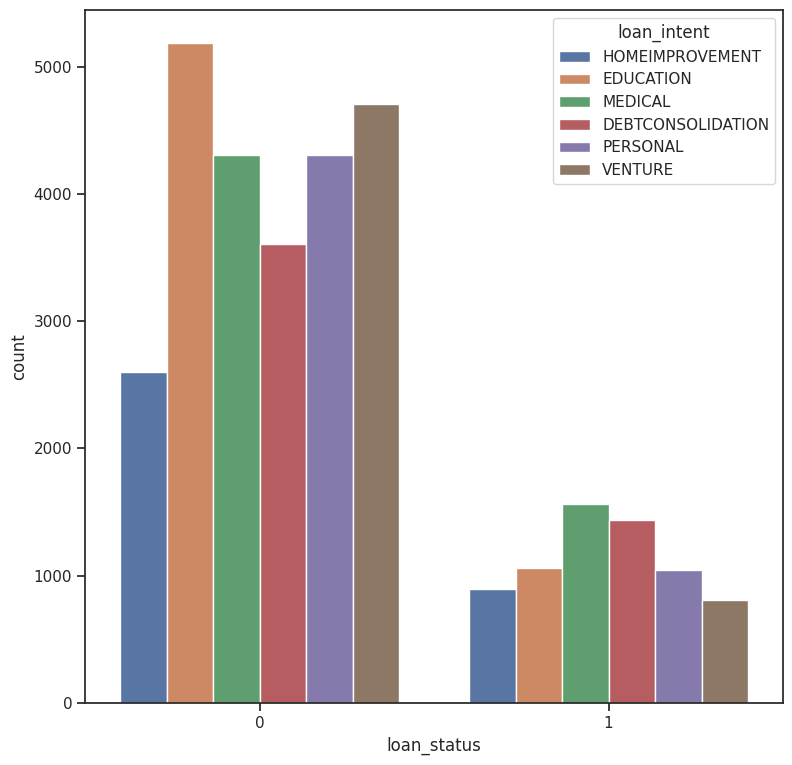

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(x=df["loan_status"], hue=df["loan_intent"])

# Avaliação das features categóricas - classificação

In [ ]:
# Seleciona colunas não numéricas
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Imprime as colunas não numéricas
print("Colunas categóricas:")
print(non_numeric_cols)

Colunas categóricas:
['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']


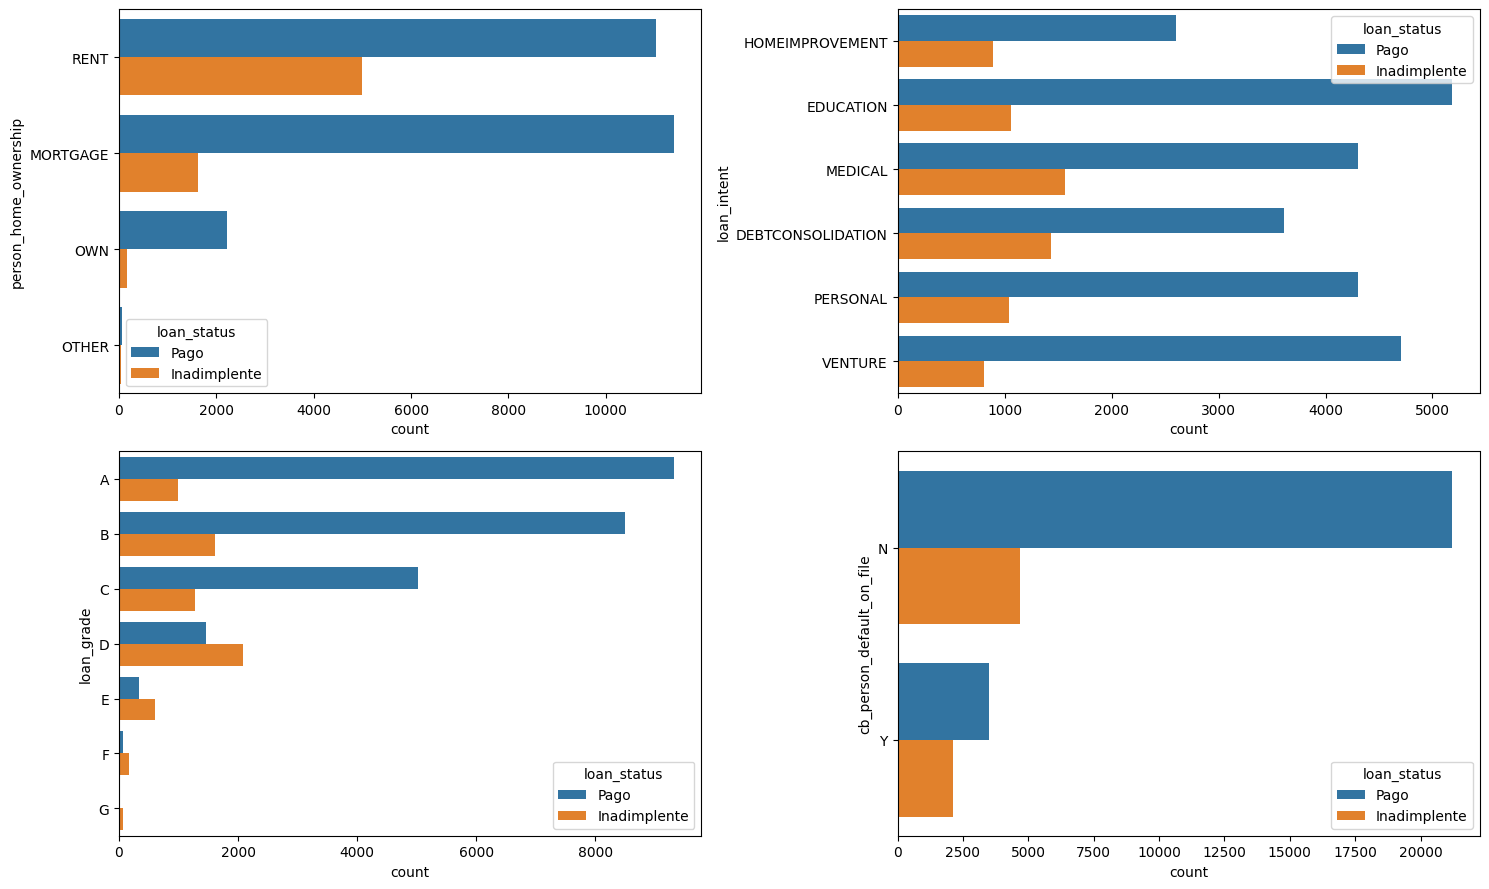

In [ ]:
var_categorical = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
plt.figure(figsize=(15,9))
for i in range(0,len(var_categorical)):
    plt.subplot(2,2,i + 1)
    sns.countplot(data= df, y = var_categorical[i], hue='loan_status')
    plt.tight_layout()


person_home_ownership

In [ ]:
df['person_home_ownership'].value_counts()

RENT        16007
MORTGAGE    13018
OWN          2391
OTHER         106
Name: person_home_ownership, dtype: int64

In [ ]:
# Tabela de frequência cruzada da coluna 'person_home_ownership'
cross_tab = pd.crosstab(df['person_home_ownership'], df['loan_status'])

# percentual por classe
cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

loan_status,Inadimplente,Pago
person_home_ownership,,
MORTGAGE,12.498080,87.501920
OTHER,31.132075,68.867925
OWN,6.942702,93.057298
RENT,31.123883,68.876117


a partir da distribuição dos dados, percebemos que a situação habitacional do cliente reflete na inadimplência ou não do empréstimo, e decidimos criar uma classificação para os dados

In [ ]:
mapping = {'OWN': 1, 'MORTGAGE': 2, 'RENT': 3, 'OTHER': 3}

utilizaremos o 'df_class', onde serão feitas as classificações das colunas categóricas

In [ ]:
df_1 = df.copy()

In [ ]:
df_1['person_home_ownership'] = df_1['person_home_ownership'].map(mapping)

In [ ]:
df_1['person_home_ownership'].value_counts()

3    16113
2    13018
1     2391
Name: person_home_ownership, dtype: int64

loan_intent

In [ ]:
df_1['loan_intent'].value_counts()

EDUCATION            6246
MEDICAL              5868
VENTURE              5519
PERSONAL             5346
DEBTCONSOLIDATION    5044
HOMEIMPROVEMENT      3499
Name: loan_intent, dtype: int64

In [ ]:
# Tabela de frequência cruzada da coluna 'loan_intent'
cross_tab = pd.crosstab(df_1['loan_intent'], df_1['loan_status'])

# percentual por classe
cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

loan_status,Inadimplente,Pago
loan_intent,,
DEBTCONSOLIDATION,28.449643,71.550357
EDUCATION,16.986872,83.013128
HOMEIMPROVEMENT,25.607316,74.392684
MEDICAL,26.601909,73.398091
PERSONAL,19.528620,80.471380
VENTURE,14.694691,85.305309


para os dados de loan_intent, utilizaremos o metódo get_dummies, por entender que não há uma ordem natural entre as categorias e pouco impacto em nosso target

In [ ]:
df_1 = pd.get_dummies(df_1, columns=['loan_intent'], prefix=['intent'], drop_first=True)

loan_grade

In [ ]:
df_1['loan_grade'].value_counts()

A    10300
B    10121
C     6300
D     3550
E      951
F      236
G       64
Name: loan_grade, dtype: int64

In [ ]:
# Tabela de frequência cruzada da coluna 'loan_grade'
cross_tab = pd.crosstab(df_1['loan_grade'], df_1['loan_status'])

# percentual por classe
cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

loan_status,Inadimplente,Pago
loan_grade,,
A,9.563107,90.436893
B,15.966802,84.033198
C,20.317460,79.682540
D,58.788732,41.211268
E,64.248160,35.751840
F,70.338983,29.661017
G,98.437500,1.562500


utilizaremos, a principio, uma classificação ordinal simples:

In [ ]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df_1['loan_grade'] = df_1['loan_grade'].map(mapping)

In [ ]:
df_1.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
count,31522.000000,3.152200e+04,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000
mean,27.738246,6.650588e+04,2.435315,4.790559,2.228951,9664.992704,11.044036,0.169668,5.814701,0.198147,0.111002,0.186156,0.169596,0.175084
std,6.199611,5.275612e+04,0.630501,4.145613,1.169099,6336.636882,3.210505,0.106321,4.060622,0.398610,0.314139,0.389238,0.375283,0.380045
min,20.000000,4.000000e+03,1.000000,0.000000,1.000000,500.000000,5.420000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.945600e+04,2.000000,2.000000,1.000000,5000.000000,7.900000,0.090000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.600000e+04,3.000000,4.000000,2.000000,8000.000000,10.995555,0.150000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,8.000000e+04,3.000000,7.000000,3.000000,12500.000000,13.463542,0.230000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,2.039784e+06,3.000000,123.000000,7.000000,35000.000000,23.220000,0.830000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


cb_person_default_on_file

In [ ]:
df_1['cb_person_default_on_file'].value_counts()

N    25907
Y     5615
Name: cb_person_default_on_file, dtype: int64

In [ ]:
# Tabela de frequência cruzada da coluna 'loan_grade'
cross_tab = pd.crosstab(df_1['cb_person_default_on_file'], df_1['loan_status'])

# percentual por classe
cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

loan_status,Inadimplente,Pago
cb_person_default_on_file,,
N,18.122515,81.877485
Y,37.631345,62.368655


In [ ]:
mapping = {'N': 1, 'Y': 2}
df_1['cb_person_default_on_file'] = df_1['cb_person_default_on_file'].map(mapping)

In [ ]:
df_1.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
count,31522.000000,3.152200e+04,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000
mean,27.738246,6.650588e+04,2.435315,4.790559,2.228951,9664.992704,11.044036,0.169668,1.178130,5.814701,0.198147,0.111002,0.186156,0.169596,0.175084
std,6.199611,5.275612e+04,0.630501,4.145613,1.169099,6336.636882,3.210505,0.106321,0.382628,4.060622,0.398610,0.314139,0.389238,0.375283,0.380045
min,20.000000,4.000000e+03,1.000000,0.000000,1.000000,500.000000,5.420000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.945600e+04,2.000000,2.000000,1.000000,5000.000000,7.900000,0.090000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.600000e+04,3.000000,4.000000,2.000000,8000.000000,10.995555,0.150000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,8.000000e+04,3.000000,7.000000,3.000000,12500.000000,13.463542,0.230000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,2.039784e+06,3.000000,123.000000,7.000000,35000.000000,23.220000,0.830000,2.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Criando nossos modelos**

## Utilizaremos 02 algoritmos para comparação dos resultados:
### - Logistic Regression
### - Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

No primeiro momento testaremos modelos com os dados desbalanceados


In [ ]:
X = df_1.drop(columns=["loan_status"])
y = df_1["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
lista_etapas = [("std_scaler", StandardScaler()), ("rlog", LogisticRegression(max_iter=5000))]

pipe_rlog = Pipeline(lista_etapas)
pipe_rlog

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rlog', LogisticRegression(max_iter=5000))])

In [ ]:
lista_etapas = [("std_scaler", StandardScaler()), ("rlog", LogisticRegression(max_iter=5000))]

pipe_rlog = Pipeline(lista_etapas)
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label='Inadimplente')

param_grid = {"rlog__penalty" : ['l2']}

grid_rlog = GridSearchCV(estimator=pipe_rlog,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

In [ ]:
grid_rlog.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START rlog__penalty=l2...........................................
[CV 1/10; 1/1] END ............rlog__penalty=l2;, score=0.537 total time=   0.1s
[CV 2/10; 1/1] START rlog__penalty=l2...........................................
[CV 2/10; 1/1] END ............rlog__penalty=l2;, score=0.523 total time=   0.2s
[CV 3/10; 1/1] START rlog__penalty=l2...........................................
[CV 3/10; 1/1] END ............rlog__penalty=l2;, score=0.528 total time=   0.1s
[CV 4/10; 1/1] START rlog__penalty=l2...........................................
[CV 4/10; 1/1] END ............rlog__penalty=l2;, score=0.473 total time=   0.2s
[CV 5/10; 1/1] START rlog__penalty=l2...........................................
[CV 5/10; 1/1] END ............rlog__penalty=l2;, score=0.462 total time=   0.2s
[CV 6/10; 1/1] START rlog__penalty=l2...........................................
[CV 6/10; 1/1] END ............rlog__penalty=l2;

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rlog',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'rlog__penalty': ['l2']},
             scoring=make_scorer(recall_score, pos_label=Inadimplente),
             verbose=10)


Métricas de avaliação de treino:
[[ 2746  2700]
 [  950 18821]]


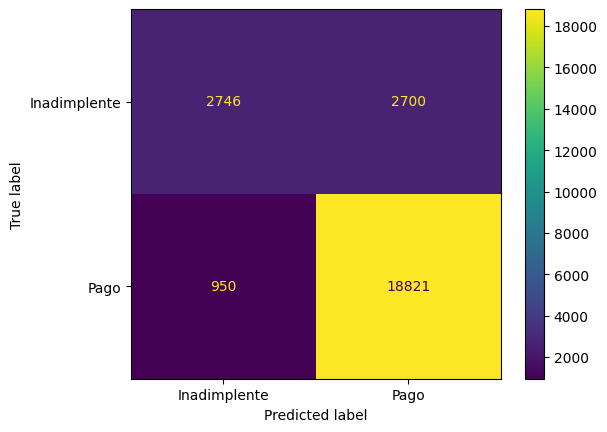

              precision    recall  f1-score   support

Inadimplente       0.74      0.50      0.60      5446
        Pago       0.87      0.95      0.91     19771

    accuracy                           0.86     25217
   macro avg       0.81      0.73      0.76     25217
weighted avg       0.85      0.86      0.84     25217


Métricas de avaliação de teste:
[[ 679  683]
 [ 241 4702]]


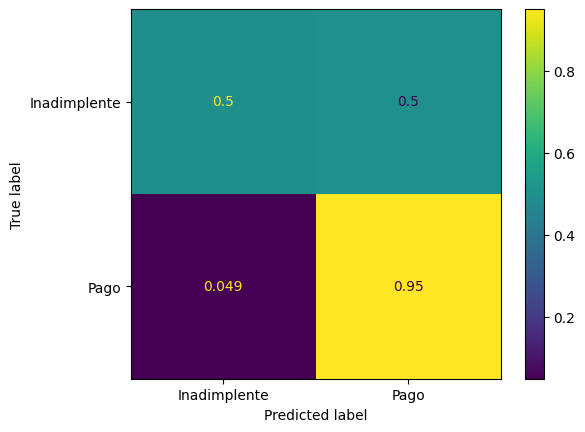

              precision    recall  f1-score   support

Inadimplente       0.74      0.50      0.60      1362
        Pago       0.87      0.95      0.91      4943

    accuracy                           0.85      6305
   macro avg       0.81      0.72      0.75      6305
weighted avg       0.84      0.85      0.84      6305



In [ ]:
print("\nMétricas de avaliação de treino:")

y_pred_train = grid_rlog.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_rlog.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize = 'true')
plt.show()

print(classification_report(y_test, y_pred_test))

# - Random Forest

In [ ]:
lista_etapas = [("std_scaler", StandardScaler()),
                ("rf", RandomForestClassifier())]

pipe_randforest = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label = 'Inadimplente')

param_grid = {"rf__n_estimators" : range(50, 500, 50),
              "rf__max_depth" : range(2, 6),
              "rf__max_features" : ['sqrt', 'log'],
              "rf__criterion" : ['entropy', 'gini']}

grid_rf = GridSearchCV(estimator=pipe_randforest,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_rf.fit(X_train, y_train)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10; 1/144] START rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators=50
[CV 1/10; 1/144] END rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators=50;, score=0.371 total time=   0.4s
[CV 2/10; 1/144] START rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators=50
[CV 2/10; 1/144] END rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators=50;, score=0.094 total time=   0.4s
[CV 3/10; 1/144] START rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators=50
[CV 3/10; 1/144] END rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators=50;, score=0.117 total time=   0.4s
[CV 4/10; 1/144] START rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators=50
[CV 4/10; 1/144] END rf__criterion=entropy, rf__max_depth=2, rf__max_features=sqrt, rf__n_estimators

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-p

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['entropy', 'gini'],
                         'rf__max_depth': range(2, 6),
                         'rf__max_features': ['sqrt', 'log'],
                         'rf__n_estimators': range(50, 500, 50)},
             scoring=make_scorer(recall_score, pos_label=Inadimplente),
             verbose=10)


Métricas de avaliação de treino:
[[ 3455  1991]
 [  144 19627]]


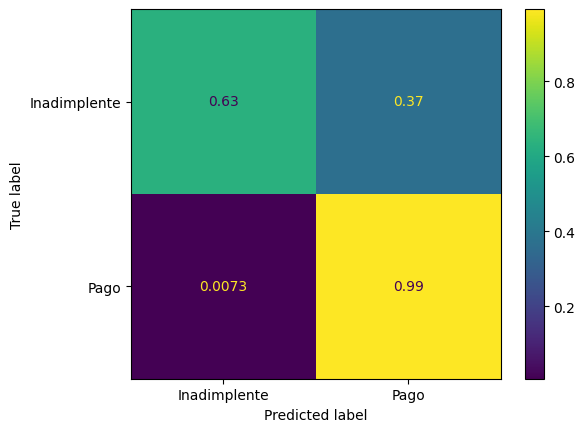

              precision    recall  f1-score   support

Inadimplente       0.96      0.63      0.76      5446
        Pago       0.91      0.99      0.95     19771

    accuracy                           0.92     25217
   macro avg       0.93      0.81      0.86     25217
weighted avg       0.92      0.92      0.91     25217


Métricas de avaliação de teste:
[[ 847  515]
 [  44 4899]]


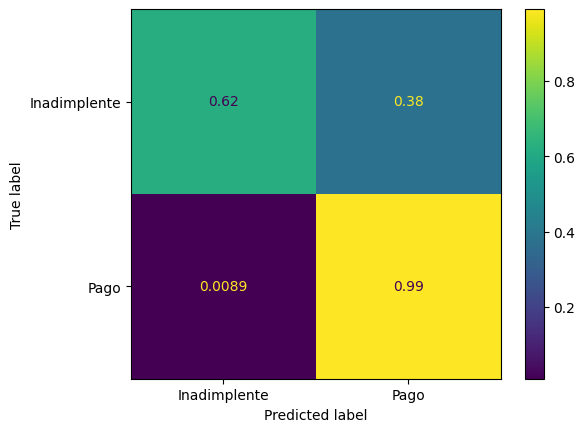

              precision    recall  f1-score   support

Inadimplente       0.95      0.62      0.75      1362
        Pago       0.90      0.99      0.95      4943

    accuracy                           0.91      6305
   macro avg       0.93      0.81      0.85      6305
weighted avg       0.91      0.91      0.90      6305



In [ ]:
print("\nMétricas de avaliação de treino:")

y_pred_train = grid_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize= 'true')
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize = 'true')
plt.show()

print(classification_report(y_test, y_pred_test))

# Testando balanceamento artificial



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline

# Regressão logística

In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
#construir o pipeline
steps = [('smote', SMOTEENN()),
         ('scaler', StandardScaler()),
         ('model', LogisticRegression(max_iter=5000))]

pipe = imbpipeline(steps)
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
metrica = make_scorer(recall_score, pos_label='Inadimplente')

param_grid = {"rlog__penalty" : ['l2']}

grid_rlog = GridSearchCV(estimator=pipe_rlog,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)



In [ ]:
grid_rlog.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START rlog__penalty=l2...........................................
[CV 1/10; 1/1] END ............rlog__penalty=l2;, score=0.537 total time=   0.1s
[CV 2/10; 1/1] START rlog__penalty=l2...........................................
[CV 2/10; 1/1] END ............rlog__penalty=l2;, score=0.523 total time=   0.2s
[CV 3/10; 1/1] START rlog__penalty=l2...........................................
[CV 3/10; 1/1] END ............rlog__penalty=l2;, score=0.528 total time=   0.2s
[CV 4/10; 1/1] START rlog__penalty=l2...........................................
[CV 4/10; 1/1] END ............rlog__penalty=l2;, score=0.473 total time=   0.2s
[CV 5/10; 1/1] START rlog__penalty=l2...........................................
[CV 5/10; 1/1] END ............rlog__penalty=l2;, score=0.462 total time=   0.2s
[CV 6/10; 1/1] START rlog__penalty=l2...........................................
[CV 6/10; 1/1] END ............rlog__penalty=l2;

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rlog',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'rlog__penalty': ['l2']},
             scoring=make_scorer(recall_score, pos_label=Inadimplente),
             verbose=10)


Métricas de avaliação de treino:
[[ 2746  2700]
 [  950 18821]]


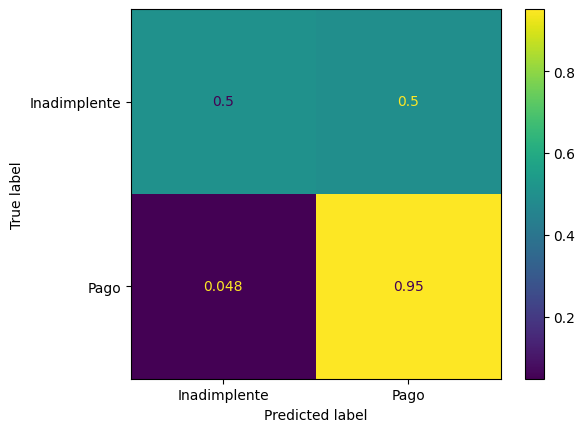

              precision    recall  f1-score   support

Inadimplente       0.74      0.50      0.60      5446
        Pago       0.87      0.95      0.91     19771

    accuracy                           0.86     25217
   macro avg       0.81      0.73      0.76     25217
weighted avg       0.85      0.86      0.84     25217


Métricas de avaliação de teste:
[[ 679  683]
 [ 241 4702]]


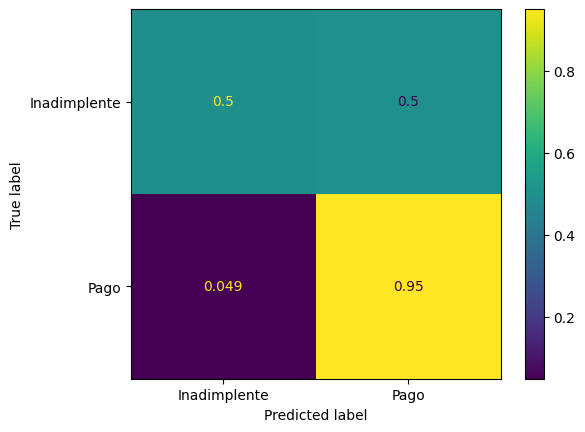

              precision    recall  f1-score   support

Inadimplente       0.74      0.50      0.60      1362
        Pago       0.87      0.95      0.91      4943

    accuracy                           0.85      6305
   macro avg       0.81      0.72      0.75      6305
weighted avg       0.84      0.85      0.84      6305



In [ ]:
print("\nMétricas de avaliação de treino:")

y_pred_train = grid_rlog.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize = 'true')
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_rlog.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize = 'true')
plt.show()

print(classification_report(y_test, y_pred_test))